# This notebook is prepared by ApplAi's Technical And Training Depratment. 
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


### 

### Task 1: Importing libraries and Exploring the Dataset.

In [ ]:
#importing the data
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as pl
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score
from sklearn.tree import plot_tree 
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn import tree 
import plotly.figure_factory as ff
from sklearn import metrics
dataset = pd.read_excel('healthcare-dataset.xlsx')



In [ ]:
#checking the data
print(dataset.head(5))


        id  gender   age  hypertension  heart_disease ever_married  \
0   9046.0    Male  67.0           0.0            1.0          Yes   
1  51676.0  Female  61.0           0.0            0.0          Yes   
2  31112.0    Male  80.0           0.0            1.0          Yes   
3  60182.0  Female  49.0           0.0            0.0          Yes   
4   1665.0  Female  79.0           1.0            0.0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  


In [ ]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   float64
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   float64
 4   heart_disease      5110 non-null   float64
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   float64
dtypes: float64(7), object(5)
memory usage: 479.2+ KB


In [ ]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# #Decide which categorical variable you want to use in model:
# for col_name in X.columns:
#    if X[col_name].dtypes=='object':
#       unique_cat = len(X[col_name].unique())
#       print("Feature '{col_name}' has {unique_cat} unique categories").format(col_name = col_name, unique_cat = unique_cat))\df.nunique()


### Task 2: Definining Exploratory Data Analysis with an overview of the whole project 

In [ ]:
dataset['stroke'].describe()

count    5110.000000
mean        0.048728
std         0.215320
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

In [ ]:
print('There are :',dataset.duplicated().sum(),' duplicated values')

There are : 0  duplicated values


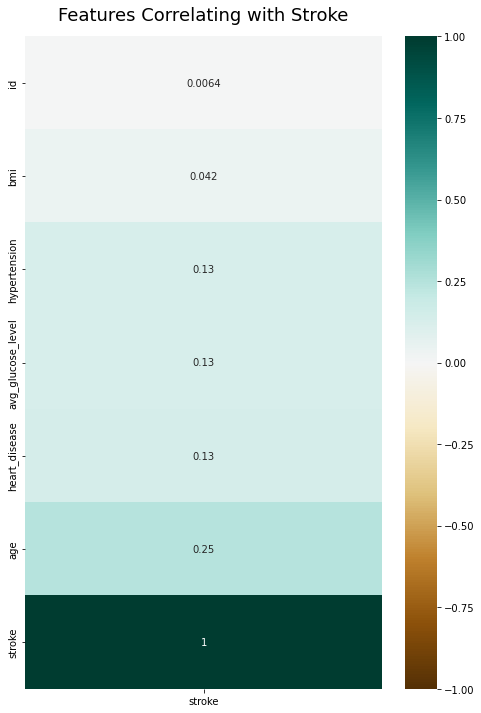

In [ ]:
#visualize the correlation
dataset.corr()[['stroke']].sort_values(by='stroke')
pl.figure(figsize=(8, 12))
heatmap = sns.heatmap(dataset.corr()[['stroke']].sort_values(by='stroke'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Stroke', fontdict={'fontsize':18}, pad=16);
    

0.0    4861
1.0     249
Name: stroke, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


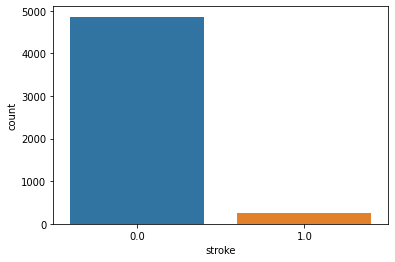

In [ ]:
#Visualize the difference between percentages of stroke prediction.
dataset['stroke'].value_counts()
print(dataset['stroke'].value_counts())
sns.countplot(dataset['stroke'], label = 'count of 1 or 0')

In [ ]:
#take a look at the outcome variable: 'stroke'
y = dataset['stroke']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 4.87 --> (249 patient)
Percentage of patient did not have a stroke: % 95.13 --> (4861 patient)


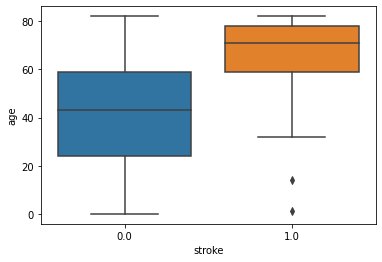

In [ ]:
#When age increases, also the mean score on the stroke is increases.
sns.boxplot(x=dataset['stroke'], y=dataset['age'])

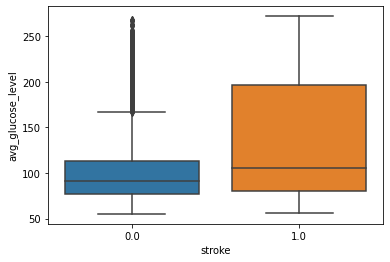

In [ ]:
#Plotting the impact of Glucose level on stroke prediction.
sns.boxplot(x=dataset['stroke'], y=dataset['avg_glucose_level'])

In [ ]:
fig = px.histogram(dataset, x="hypertension", color="stroke",width=400, height=400)
fig.show()
#Person with hypertension are likely to get stroke than the ones who don't have hypertension

In [ ]:
fig = px.histogram(dataset, x="gender", color="stroke",width=400, height=400)
fig.show()
#Male compare to female are more likely to get stroke. 

In [ ]:
fig = px.histogram(dataset, x="ever_married", color="stroke",width=400, height=400)
fig.show()
#Person who is married(or married before) are more likely to get stroke than the ones who don't have marriage history.

In [ ]:
fig = px.histogram(dataset, x="smoking_status", color="stroke",width=600, height=600)
fig.show()
#There are differeneces based on the smoking habits.

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [ ]:
#drop unnecessary columns
dataset.drop('id', axis=1,inplace = True)

In [ ]:
#counting the null values
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#drop bmi rows
dataset = dataset.dropna()

In [ ]:
#checking the unique categories to encode the data.
dataset.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
#encoding all the categorical data
dataset['gender'].replace(['Female','Male', 'Other'],[1,0,2], inplace = True)
dataset['ever_married'].replace(['Yes','No'],[1,0], inplace = True)
dataset['work_type'].replace(['Private','Self-employed','Govt_job', 'children', 'Never_worked'],[0,1,2,3,4], inplace = True)
dataset['Residence_type'].replace(['Urban','Rural'],[0,1], inplace = True)
dataset['smoking_status'].replace(['formerly smoked','never smoked','smokes','Unknown'],[1,0,2,-1], inplace = True)
print(dataset)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0           0.0            1.0             1          0   
2          0  80.0           0.0            1.0             1          0   
3          1  49.0           0.0            0.0             1          0   
4          1  79.0           1.0            0.0             1          1   
5          0  81.0           0.0            0.0             1          0   
...      ...   ...           ...            ...           ...        ...   
5104       1  13.0           0.0            0.0             0          3   
5106       1  81.0           0.0            0.0             1          1   
5107       1  35.0           0.0            0.0             1          1   
5108       0  51.0           0.0            0.0             1          0   
5109       1  44.0           0.0            0.0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0              

In [ ]:
dataset['smoking_status'].value_counts()[-1]

1483

In [ ]:
#Checking outliersfor bmi using IQR 
Q1 = dataset.bmi.quantile(0.40)
Q3 = dataset.bmi.quantile(0.70)
Q1,Q3


(26.4, 31.9)

In [ ]:
#Calculating IQR
IQR = Q3-Q1
IQR

5.5

In [ ]:
#Calculating upper limit & lower limit
lower_limit = Q1-1.5*IQR
upper_limit = Q3 + 1.5*IQR
upper_limit, lower_limit

(40.15, 18.15)

In [ ]:
#printing the outliers
dataset[(dataset.bmi<lower_limit) |(dataset.bmi>upper_limit)  ]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,1,52.00,1.0,0.0,1,1,0,233.29,48.9,0,1.0
30,0,57.00,1.0,0.0,1,0,0,212.08,44.2,2,1.0
60,1,56.00,0.0,0.0,1,0,0,185.17,40.4,1,1.0
66,1,70.00,0.0,0.0,1,0,0,221.58,47.5,0,1.0
79,0,43.00,0.0,0.0,1,1,0,143.43,45.9,-1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5089,1,0.72,0.0,0.0,0,3,1,62.13,16.8,-1,0.0
5095,0,1.08,0.0,0.0,0,3,1,79.15,17.4,-1,0.0
5097,0,68.00,0.0,0.0,1,1,0,91.68,40.8,-1,0.0
5098,0,9.00,0.0,0.0,0,3,0,71.88,17.5,-1,0.0


In [ ]:
#Checking outliersfor Glucose level using IQR 
Q1 = dataset.avg_glucose_level.quantile(0.62)
Q3 = dataset.avg_glucose_level.quantile(0.78)
Q1,Q3


(100.1996, 118.81)

In [ ]:
#Calculating IQR
IQR = Q3-Q1
IQR

18.6104

In [ ]:
#Calculating upper limit & lower limit
lower_limit = Q1-1.5*IQR
upper_limit = Q3 + 1.5*IQR
upper_limit, lower_limit

(146.7256, 72.284)

In [ ]:
#printing the outliers
dataset[(dataset.avg_glucose_level<lower_limit) |(dataset.avg_glucose_level>upper_limit)  ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.00,0.0,1.0,1,0,0,228.69,36.6,1,1.0
3,1,49.00,0.0,0.0,1,0,0,171.23,34.4,2,1.0
4,1,79.00,1.0,0.0,1,1,1,174.12,24.0,0,1.0
5,0,81.00,0.0,0.0,1,0,0,186.21,29.0,1,1.0
6,0,74.00,1.0,1.0,1,0,1,70.09,27.4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5086,1,51.00,0.0,0.0,1,0,0,152.56,21.8,-1,0.0
5089,1,0.72,0.0,0.0,0,3,1,62.13,16.8,-1,0.0
5098,0,9.00,0.0,0.0,0,3,0,71.88,17.5,-1,0.0
5100,0,82.00,1.0,0.0,1,1,1,71.97,28.3,0,0.0


In [ ]:
# dataset[numbers].skew()

In [ ]:
# dataset[numbers].describe()

In [ ]:
# dataset[numbers].hist(figsize=(8,6))

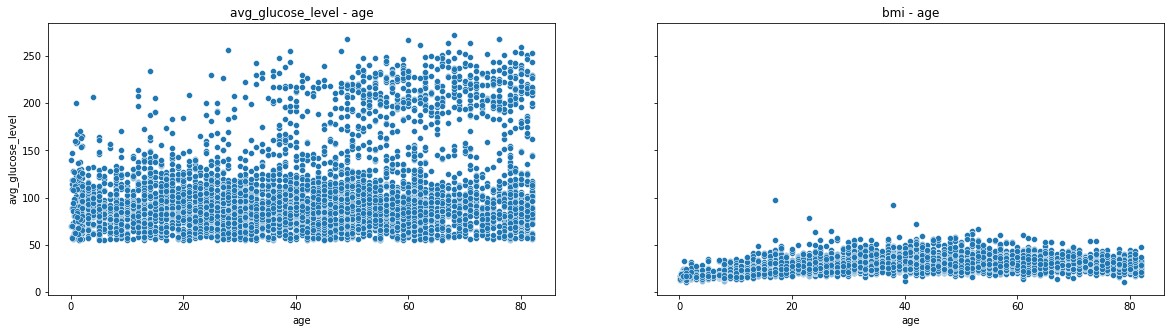

In [ ]:
f, (ax1, ax2) = pl.subplots(1, 2, sharey=True, figsize=(20,5))

sns.scatterplot(x=dataset['age'], y=dataset['avg_glucose_level'], ax=ax1)
ax1.set_xlabel('age')
ax1.set_ylabel('avg_glucose_level')
ax1.set_title('avg_glucose_level - age')

sns.scatterplot(x=dataset['age'], y=dataset['bmi'], ax=ax2)
ax2.set_xlabel('age')
ax2.set_ylabel('bmi')
ax2.set_title('bmi - age')

pl.show()

In [ ]:
#We have 276 patient with heart disease which is 5.4 % of the sample.
print (f'{round(dataset["heart_disease"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(dataset, x="heart_disease", title='heart_disease', width=400, height=400)
fig.show()

0.0    95.05
1.0     4.95
Name: heart_disease, dtype: float64


In [ ]:
print (f'A person with heart disease has a probability of {round(dataset[dataset["heart_disease"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person without heart disease has a probability of {round(dataset[dataset["heart_disease"]==0]["stroke"].mean()*100,2)} % get a stroke')

A person with heart disease has a probability of 16.46 % get a stroke

A person without heart disease has a probability of 3.62 % get a stroke


In [ ]:
#1892 people are never smoked
#789 people smoke
print (f'{round(dataset["smoking_status"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(dataset, x="smoking_status", title='smoking_status', width=400, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

 0    37.73
-1    30.21
 1    17.05
 2    15.01
Name: smoking_status, dtype: float64


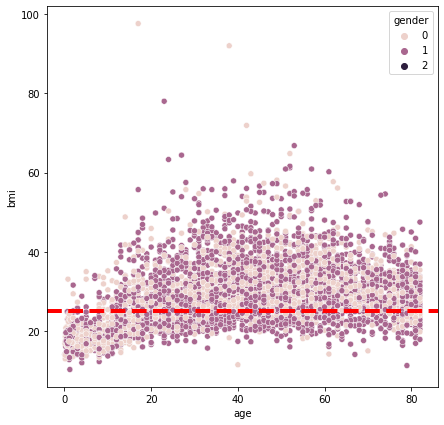

In [ ]:
#Age vs BMI
fig = pl.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
pl.show()

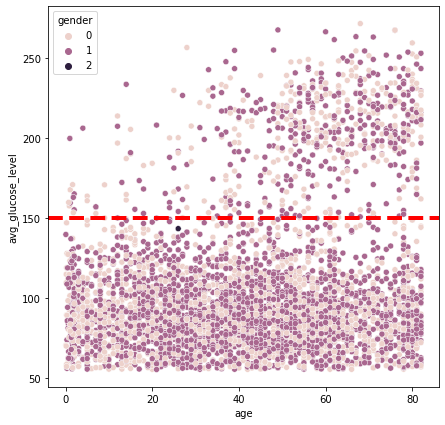

In [ ]:
#Age vs Avg. Glucose Level 
fig = pl.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
pl.show()

<Figure size 720x720 with 0 Axes>

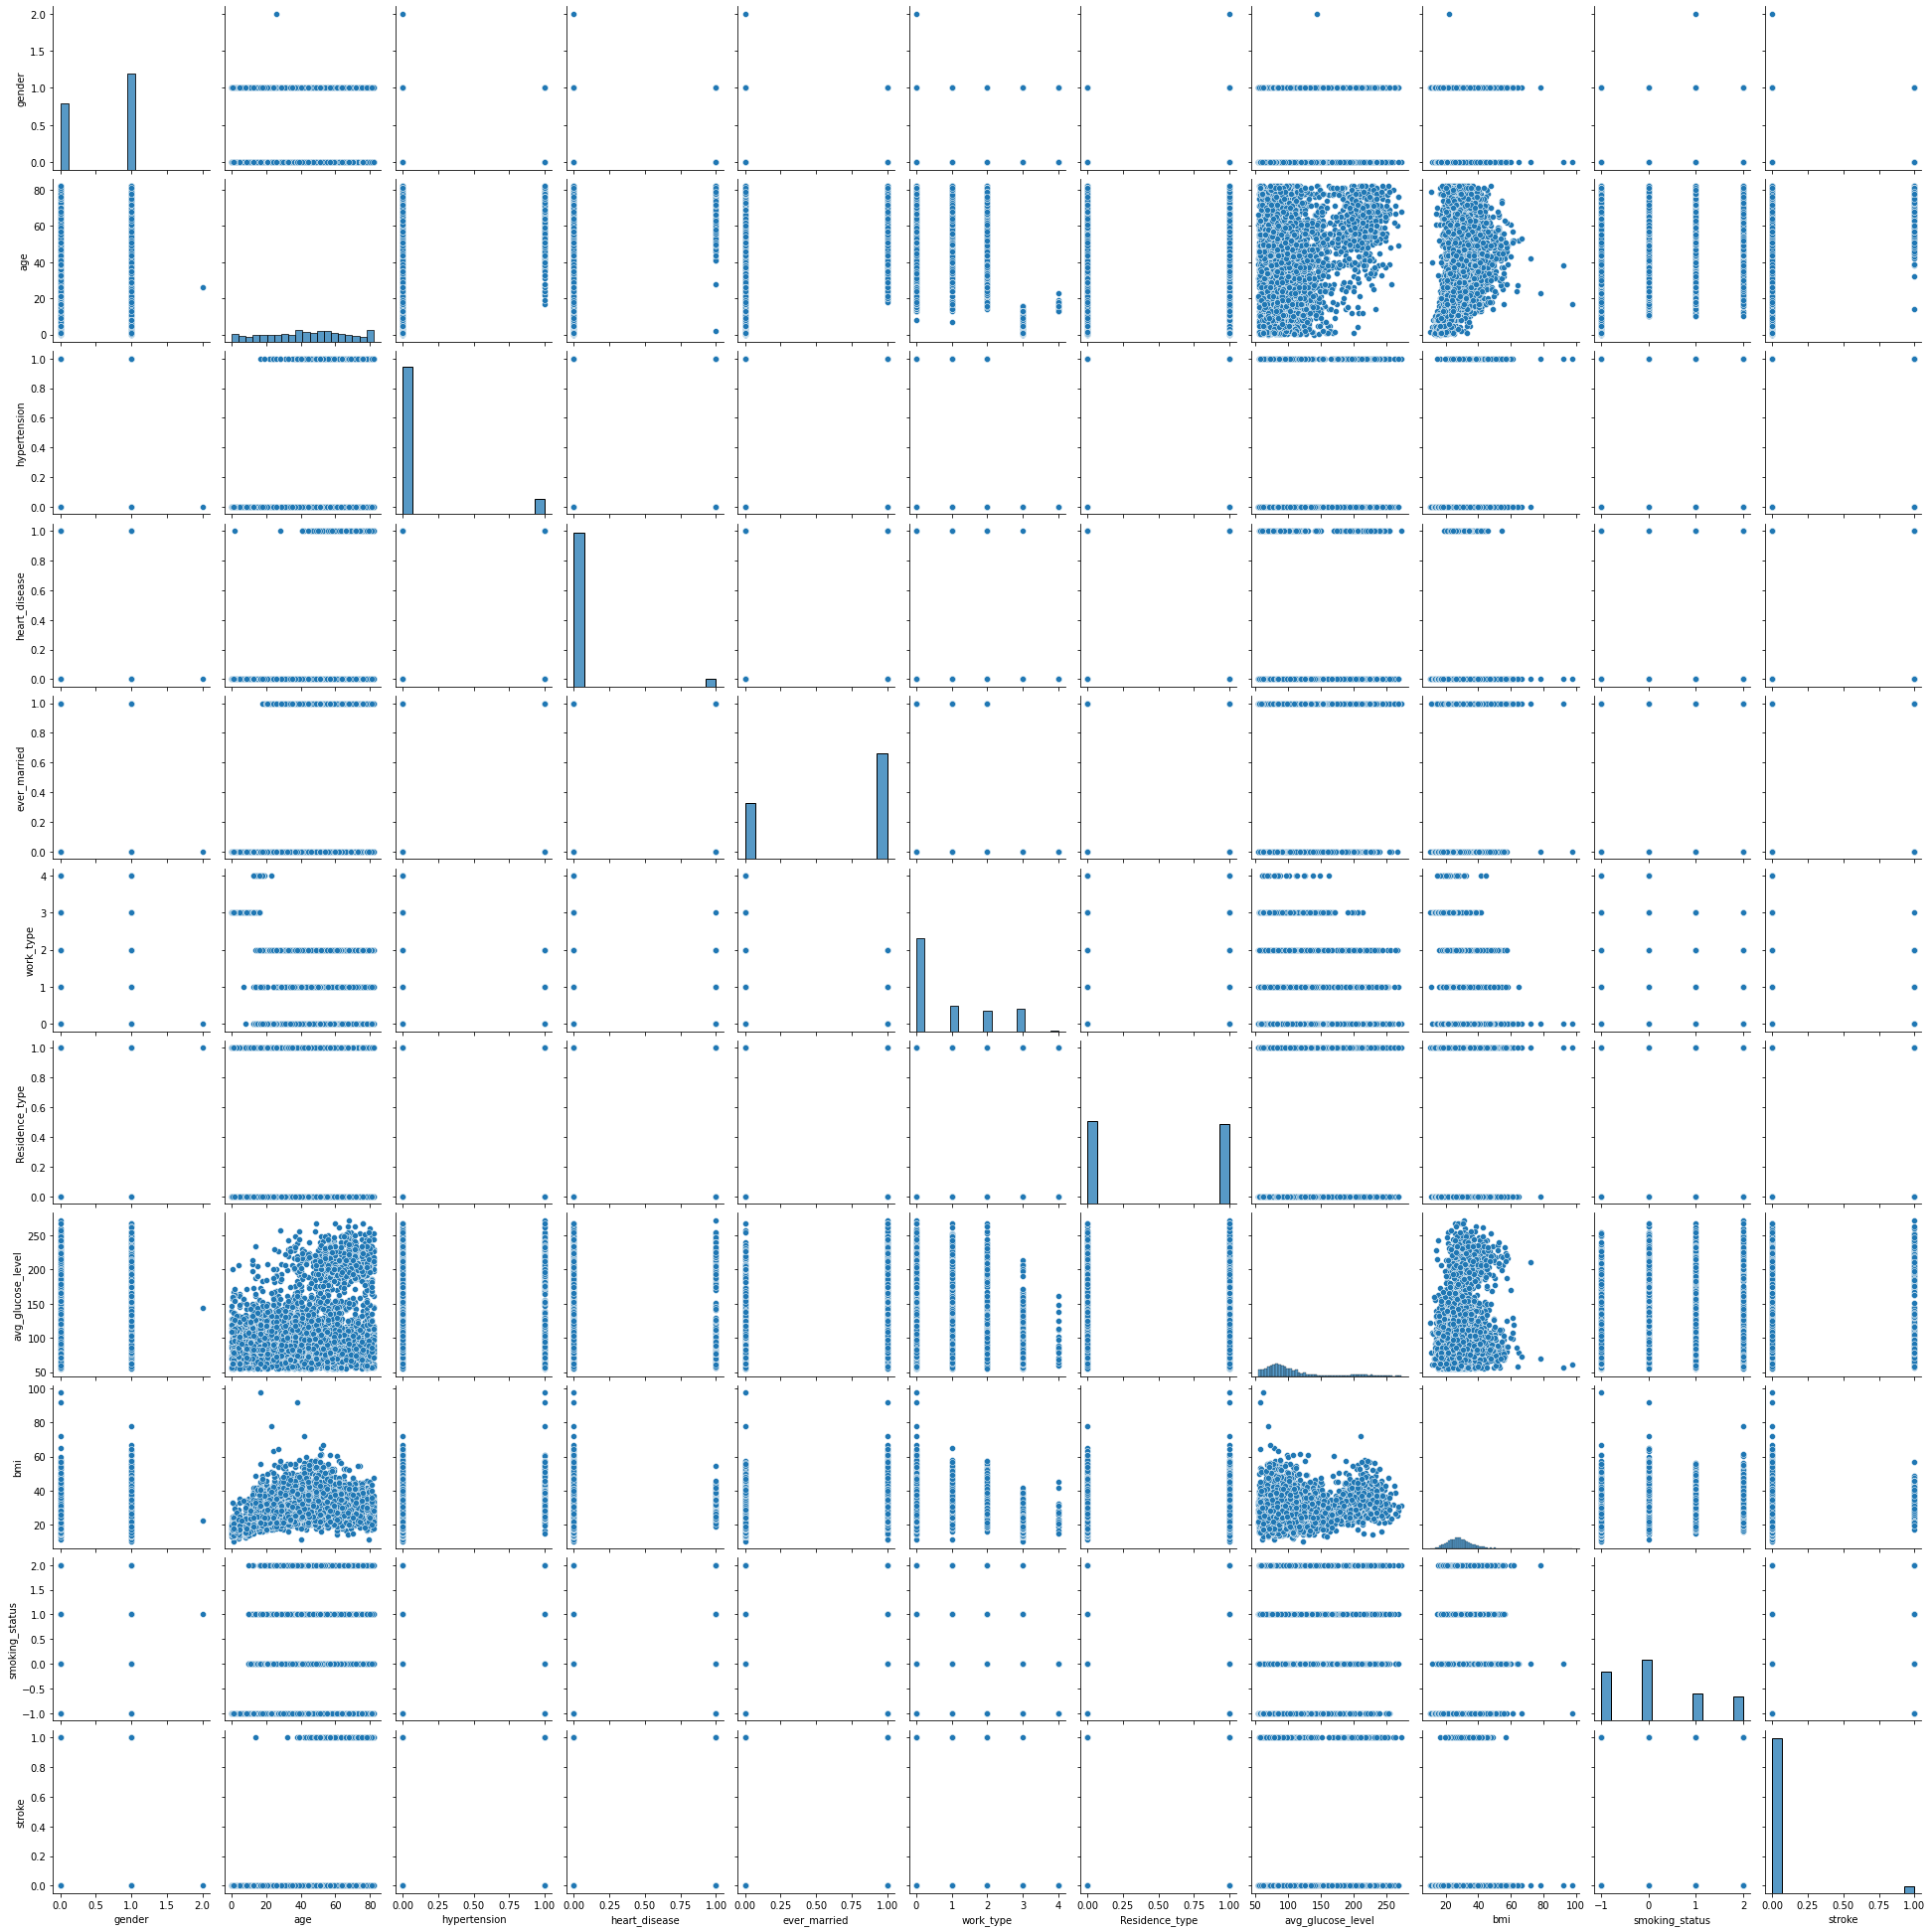

In [ ]:
#Pair Plot for the whole dataset.

fig = pl.figure(figsize=(10,10))
sns.pairplot(dataset)
pl.show()

### Task 4: creat a model that fits the data

In [ ]:
# Assign X as a DataFrame pf features and Y as a series of the outcome variable
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]
print(X)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0           0.0            1.0             1          0   
2          0  80.0           0.0            1.0             1          0   
3          1  49.0           0.0            0.0             1          0   
4          1  79.0           1.0            0.0             1          1   
5          0  81.0           0.0            0.0             1          0   
...      ...   ...           ...            ...           ...        ...   
5104       1  13.0           0.0            0.0             0          3   
5106       1  81.0           0.0            0.0             1          1   
5107       1  35.0           0.0            0.0             1          1   
5108       0  51.0           0.0            0.0             1          0   
5109       1  44.0           0.0            0.0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  0   

In [ ]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state =1 )

In [ ]:
#Feature scaling .
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#modelling LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
#fitting the data into.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predictions of the model using testing data.
y_pred = classifier.predict(X_test)


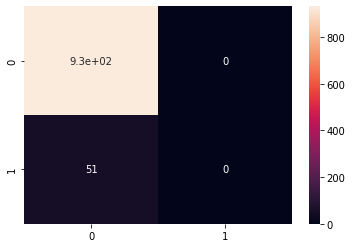

In [ ]:
#Plotting confusion matrix for Logistic Regression.
from sklearn.metrics import confusion_matrix, accuracy_score
conma = confusion_matrix(Y_test, y_pred)

accuracy_score(Y_test, y_pred)
sns.heatmap(conma, annot=True)
pl.show()


In [ ]:
#modelling using SVM.
from sklearn.svm import SVC
svcmodel = SVC()
svcmodel.fit(X_train,Y_train)

SVC()

In [ ]:
#to get predictions
prediction = svcmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
conMa = confusion_matrix(Y_test, prediction)
print('Confusion Matrix is : \n', conMa)

# drawing confusion matrix
fig = ff.create_annotated_heatmap(conMa)
fig.update_layout(
    height=400,
    width=400,
    showlegend=True,
   )
fig.show()

Confusion Matrix is : 
 [[931   0]
 [ 51   0]]


In [ ]:
#Generate a classifaction report for accuracy
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       931
         1.0       0.00      0.00      0.00        51

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.90      0.95      0.92       982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#Modelling using Random Forest model.
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# drawing confusion matrix

random_pred = randomforest.predict(X_test)

CM = confusion_matrix(Y_test, random_pred)
print('Confusion Matrix is : \n', CM)


fig = ff.create_annotated_heatmap(CM)
fig.update_layout(
    height=400,
    width=400,
    showlegend=True,
   )
fig.show()

Confusion Matrix is : 
 [[931   0]
 [ 51   0]]


In [ ]:
#Printing report for Random Forest Model.
print(classification_report(Y_test, random_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       931
         1.0       0.00      0.00      0.00        51

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.90      0.95      0.92       982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0           0.0            1.0             1          0   
2          0  80.0           0.0            1.0             1          0   
3          1  49.0           0.0            0.0             1          0   
4          1  79.0           1.0            0.0             1          1   
5          0  81.0           0.0            0.0             1          0   
...      ...   ...           ...            ...           ...        ...   
5104       1  13.0           0.0            0.0             0          3   
5106       1  81.0           0.0            0.0             1          1   
5107       1  35.0           0.0            0.0             1          1   
5108       0  51.0           0.0            0.0             1          0   
5109       1  44.0           0.0            0.0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  0   

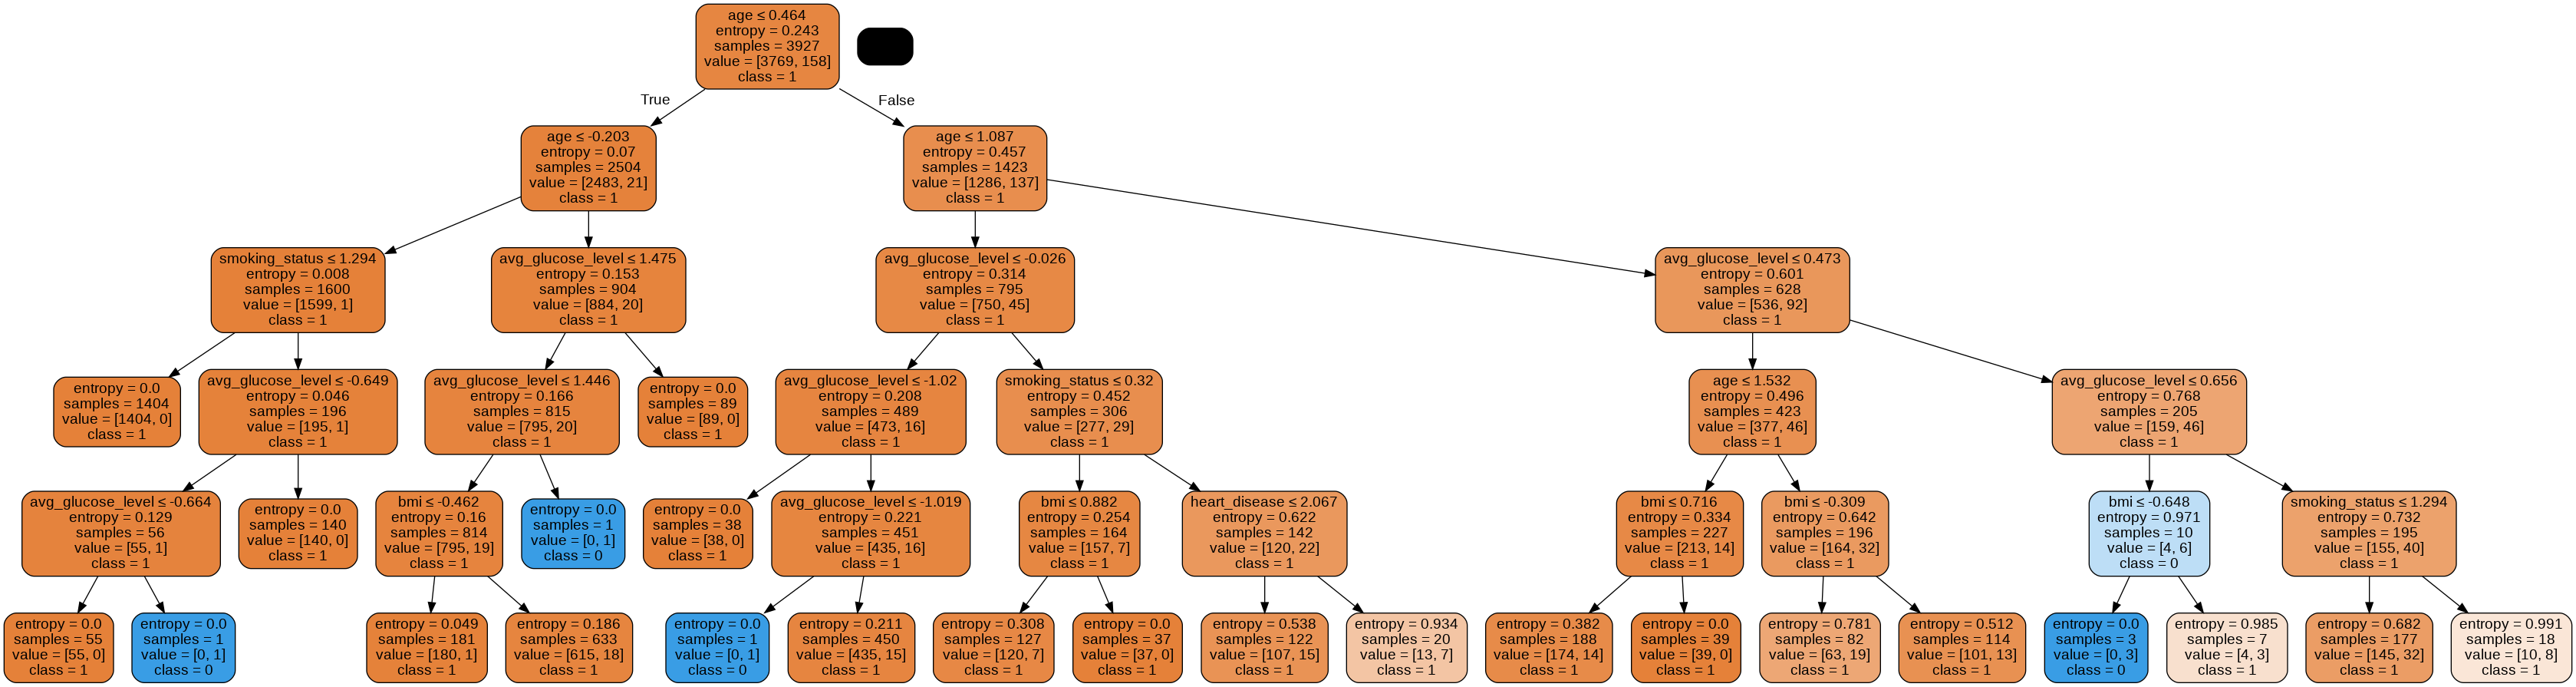

In [ ]:
#Decision tree 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
#X = dataset.iloc[:, 0:10]
#Y = dataset.iloc[:,-1]
print(X)
print(Y)
from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state =1)
Names=list(X.columns.values)
print(Names)
clf=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=5)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)      

# Draw graph
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True,special_characters=True,feature_names=Names,class_names=['1','0'])  

graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


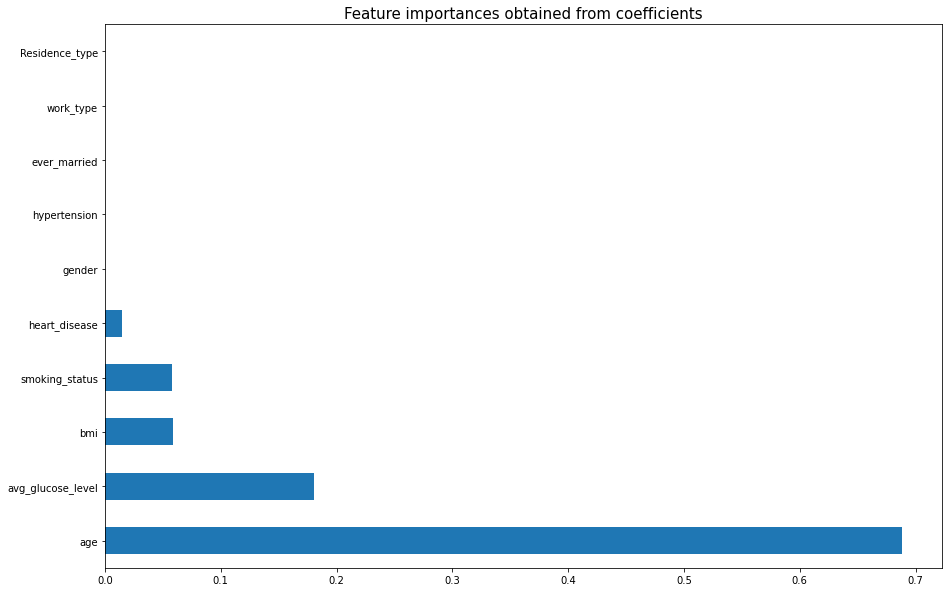

In [ ]:
#Showing that age has the highest impact on Stroke, and that clarifies that in the decision tree the most important question is asked first(which is about age) and then next important one and so on.
pl.title('Feature importances obtained from coefficients', size=15)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
pl.show()

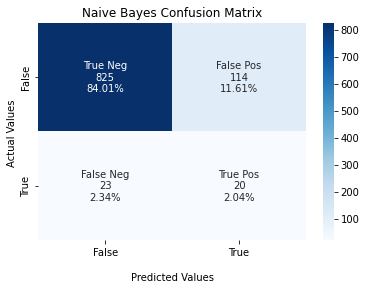

In [ ]:
#Bayesian
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state= 0, test_size=0.2)
gnb= GaussianNB()
gnb.fit(x_train, y_train)
pred= gnb.predict(x_test)
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Naive Bayes Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
pl.show()

In [ ]:
# #KNN

# X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
# #take nearest odd number for accuracy

# import math
# knn = KNeighborsClassifier(n_neighbors=math.sqrt(len(y_test)))
# #training model
# knn.fit(X_train, y_train)

### Task 5: creating an accurecy table

In [ ]:
#Plotting the accuracy table to show the most suitable model.
tree_accuracy=accuracy_score(Y_test,Y_pred)
forest_accuracy=accuracy_score(Y_test,random_pred)
svm_accuracy=accuracy_score(Y_test,prediction)
bayesian_accuracy=accuracy_score(y_test,pred)
logistic_accuracy=accuracy_score(Y_test, y_pred)
print("Acuracy score: ",tree_accuracy)
print("Acuracy score: ",forest_accuracy)
print("Acuracy score: ",svm_accuracy)
print("Acuracy score: ",bayesian_accuracy)
print("Acuracy score: ",logistic_accuracy)

Acuracy score:  0.945010183299389
Acuracy score:  0.9480651731160896
Acuracy score:  0.9480651731160896
Acuracy score:  0.860488798370672
Acuracy score:  0.9480651731160896


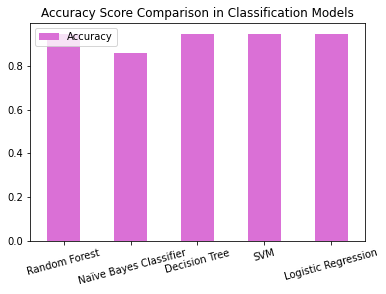

In [ ]:
data={"Accuracy":[forest_accuracy,bayesian_accuracy,tree_accuracy,svm_accuracy,logistic_accuracy]}
index=["Random Forest"," Naïve Bayes Classifier","Decision Tree","SVM","Logistic Regression"];
dataframe=pd.DataFrame(data=data,index=index);
dataframe.plot.bar(rot=15,title="Accuracy Score Comparison in Classification Models",color=['orchid'])
pl.rcParams["figure.figsize"] = (15,10)
pl.show(block=True);